In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/smresampled_dataset.csv')
data.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,target
0,4959,12.66,0,0.027,5,117.08,3,2009,1,1,3,1
1,6380,16.54,0,0.144,4,171.43,2,1999,1,0,0,2
2,4096,14.28,2,0.031,3,162.08,0,1987,0,1,2,2
3,6701,12.10,0,0.112,0,186.31,0,1987,0,1,2,2
4,7282,9.57,1,0.010,8,123.67,1,1998,2,2,1,1


In [13]:
data.isnull().sum()

Product_Id                  0
Product_Weight              0
Product_Sugar_Content       0
Product_Allocated_Area      0
Product_Type                0
Product_MRP                 0
Store_Id                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_City_Type    0
Store_Type                  0
target                      0
dtype: int64

In [14]:
data['Product_Allocated_Area']=data['Product_Allocated_Area'].ffill()

In [15]:
data.isnull().sum()

Product_Id                  0
Product_Weight              0
Product_Sugar_Content       0
Product_Allocated_Area      0
Product_Type                0
Product_MRP                 0
Store_Id                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_City_Type    0
Store_Type                  0
target                      0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Id'] = le.fit_transform(data['Product_Id'])
data['Product_Sugar_Content'] = le.fit_transform(data['Product_Sugar_Content'])
data['Product_Type'] = le.fit_transform(data['Product_Type'])
data['Store_Id'] = le.fit_transform(data['Store_Id'])
data['Store_Size'] = le.fit_transform(data['Store_Size'])
data['Store_Location_City_Type'] = le.fit_transform(data['Store_Location_City_Type'])
data['Store_Type'] = le.fit_transform(data['Store_Type'])
data['target'] = le.fit_transform(data['target'])

In [17]:
pip install xgboost


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [19]:
X = data.iloc[:,0:11]
y = data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Additional: Display a classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9718759987216363
Confusion Matrix:
[[1045    1   25]
 [   0  993   25]
 [  22   15 1003]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1071
           1       0.98      0.98      0.98      1018
           2       0.95      0.96      0.96      1040

    accuracy                           0.97      3129
   macro avg       0.97      0.97      0.97      3129
weighted avg       0.97      0.97      0.97      3129



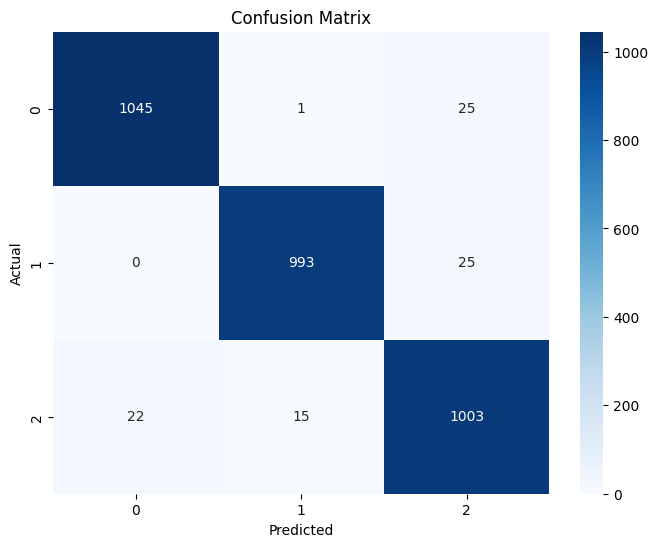

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()